In [266]:
import numpy as np
import matplotlib.pyplot as plt

In [346]:
names = r'$u-\bar{u}$', r'$d-\bar{d}$', r'$s-\bar{s}$', \
        r'$c-\bar{c}$', r'$b-\bar{b}$',\
        r'$g$', \
        r'$u+\bar{u}$', r'$d+\bar{d}$', r'$s+\bar{s}$',\
        r'$c+\bar{c}$', r'$b+\bar{b}$'
data0 = np.loadtxt("build/ic.dat").T
data = np.loadtxt("build/fs.dat").T
z = data[0]

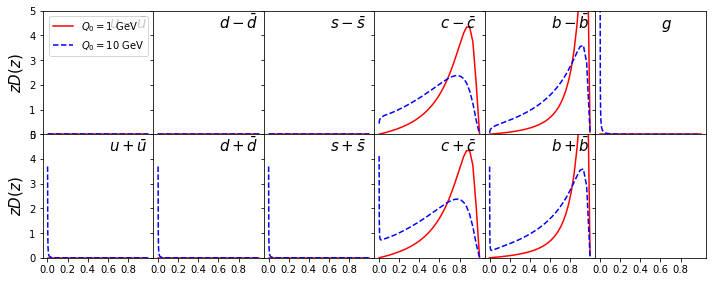

In [347]:
fig, axes = plt.subplots(2,6,figsize=(10,4), sharex=True, sharey=True)

for i, (it,ax) in enumerate(zip(names, axes.flatten()), start=1):
    ax.plot(z, data0[i]/z, 'r-', label=r'$Q_0=1$ GeV')
    ax.plot(z, data[i]/z, 'b--', label=r'$Q_0=10$ GeV')
    #ax.semilogy()
    ax.annotate(it, xy=(.6,.86), xycoords="axes fraction", fontsize=15)
    if ax.is_first_col():
        ax.set_ylabel(r"$zD(z)$", fontsize=15)
    if ax.is_last_col():
        ax.set_xlabel(r"$z$", fontsize=15)
axes[0,0].legend()
#ax.set_xlim(0,1)
ax.set_xticks([0,.2,.4,.6,.8])
ax.set_ylim(0,5)
#ax.semilogx()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

In [324]:
Q2, z, fc = np.loadtxt("build/channel.dat").T

[]

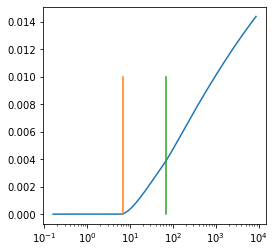

In [333]:
fig, ax = plt.subplots(1,1,figsize=(4,4), sharex=True, sharey=True)
ax.plot(Q2, fc)
ax.plot([4*1.3**2]*2, [0,.01])
ax.plot([4*4.2**2]*2, [0,.01])
#ax.set_xlim(0,120)
ax.semilogx()

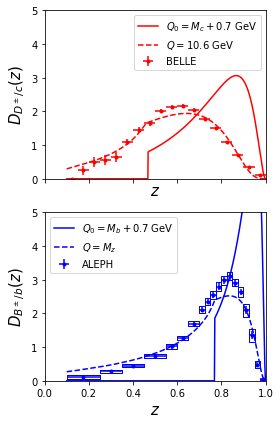

In [999]:
fig, axes = plt.subplots(2,1,figsize=(4,6), sharex=True, sharey=True)

ax = axes[0]
x, xl, xh, y, ystat, _ = np.loadtxt("data/c2Dpm.dat").T
norm = .5*((y[1:]+y[:-1])*(x[1:]-x[:-1])).sum()
y /= norm
ystat /= norm
ax.errorbar(x, y, xerr=(xh-xl)/2., yerr=ystat, fmt='r.', label='BELLE')

data0 = np.loadtxt("build/c/ic.dat").T
data = np.loadtxt("build/c/fs.dat").T
z = data[0]
y0 = (data0[4]+data0[10])/2.
y1 = (data[4]+data[10])/2.
y0 /= y0.sum()*np.log(z[1]/z[0])
y1 /= y1.sum()*np.log(z[1]/z[0])
ax.plot(z, y0/z, 'r-', label=r'$Q_0=M_c+0.7$ GeV')
ax.plot(z, y1/z, 'r--', label=r'$Q=10.6$ GeV')
ax.set_ylabel(r"$D_{D^\pm/c}(z)$", fontsize=15)
ax.set_xlabel(r"$z$", fontsize=15)
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(0,5)

ax = axes[1]
x, xl, xh, y, ystat, _, ysys, _ = np.loadtxt("data/ALEPH-b2B.dat").T
ax.errorbar(x, y, xerr=(xh-xl)/2., yerr=ystat, fmt='b.', label='ALEPH')
for il, ih, yl, yh in zip(xl,xh,y-ysys,y+ysys):
    ax.fill_between([il,ih],[yl]*2, [yh]*2, edgecolor='b', facecolor='none')

data0 = np.loadtxt("build/b/ic.dat").T
data = np.loadtxt("build/b/fs.dat").T
z = data[0]
y0 = (data0[5]+data0[11])/2.
y1 = (data[5]+data[11])/2.
y0 /= y0.sum()*np.log(z[1]/z[0])
y1 /= y1.sum()*np.log(z[1]/z[0])
ax.plot(z, y0/z, 'b-', label=r'$Q_0=M_b+0.7$ GeV')
ax.plot(z, y1/z, 'b--', label=r'$Q=M_z$')

ax.set_ylabel(r"$D_{B^\pm/b}(z)$", fontsize=15)
ax.set_xlabel(r"$z$", fontsize=15)
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(0,5)
#ax.semilogx()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.2)
plt.savefig("HF-FF.png", dpi=150)

## 